# SALES ANALYSIS

In [3]:
import pandas as pd
import os

In [4]:
#Concatenate the separate months' data into one csv
files=[file for file in os.listdir("./SalesAnalysis/Sales_Data")]

all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./SalesAnalysis/Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
all_months_data.to_csv("all_data.csv", index=False)

In [5]:
all_data=pd.read_csv("all_data.csv")

In [6]:
#Drop NaN's
nan_df = all_data[all_data.isna().any(axis=1)]
all_data = all_data.dropna(how="all")

#get rid of duplicated rows with column heads. Use "Product" in the product column to remove the rows with the column head "product"
all_data = all_data[all_data["Product"] != "Product"]

all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"], errors='coerce') #convert string to integer
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"], errors='coerce') #convert string to float

# Drop rows with missing or incorrect data
all_data = all_data.dropna(subset=["Quantity Ordered", "Price Each"])

In [55]:
#Add month column and convert to integer
all_data["Month"]=all_data["Order Date"].str[0:2]
all_data["Month"]=pd.to_numeric(all_data["Month"], errors="coerce")

#Add sales column
all_data["Sales"]=all_data["Quantity Ordered"]*all_data["Price Each"]

#### Month with the highest number of sales

In [65]:
columns_to_sum = ["Sales","Quantity Ordered"] 
total_sales = all_data.groupby("Month")[columns_to_sum].sum()

In [48]:
import matplotlib.pyplot as plt
import calendar
from matplotlib.ticker import FuncFormatter

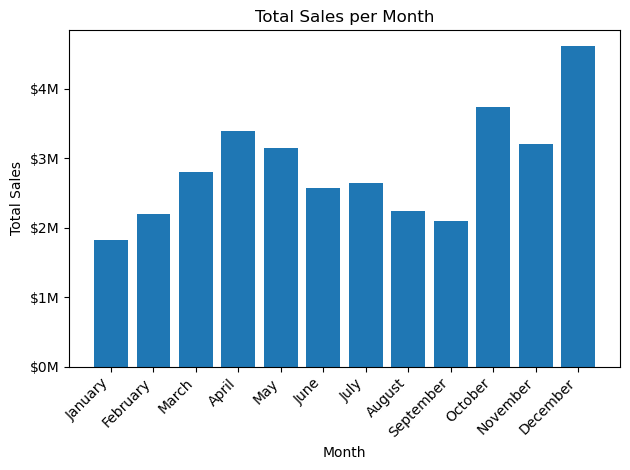

In [10]:
months = range(1, 13)
month_name_to_number = {v: k for k, v in enumerate(calendar.month_name)}

# Convert month numbers to month names
months_names = [calendar.month_name[month] for month in months]


plt.bar(months_names, Total_sales["Sales"])
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales per Month')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Formatting y-axis labels to display values in millions
formatter = FuncFormatter(lambda x, _: f'${x/10**6:.0f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# Display plot
plt.tight_layout()  # Adjust layout
plt.show()

#### City with the highest number of sales

In [35]:
#Add city column
def get_state(Address):
    return Address.split(",")[2].split(" ")[1]
def get_city(Address):
    return Address.split(",")[1]
all_data["City"]=all_data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

In [67]:
columns_to_sum = ["Sales","Quantity Ordered"] 
City_sales = all_data.groupby("City")[columns_to_sum].sum()
City_sales

,Sales,Quantity Ordered
City,,
Atlanta (GA),2795498.58,16602
Austin (TX),1819581.75,11153
Boston (MA),3661642.01,22528
Dallas (TX),2767975.40,16730
Los Angeles (CA),5452570.80,33289
New York City (NY),4664317.43,27932
Portland (ME),449758.27,2750
Portland (OR),1870732.34,11303
San Francisco (CA),8262203.91,50239


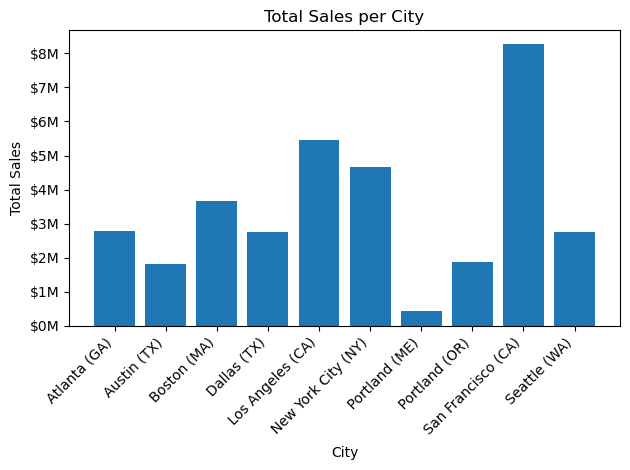

In [73]:
cities=[city for city, df in all_data.groupby("City")]


plt.bar(cities, City_sales["Sales"])
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.title('Total Sales per City')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Formatting y-axis labels to display values in millions
formatter = FuncFormatter(lambda x, _: f'${x/10**6:.0f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# Display plot
plt.tight_layout()  # Adjust layout
plt.show()

#### Opportune time to display ads

In [78]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"], format='%m/%d/%y %H:%M')
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute

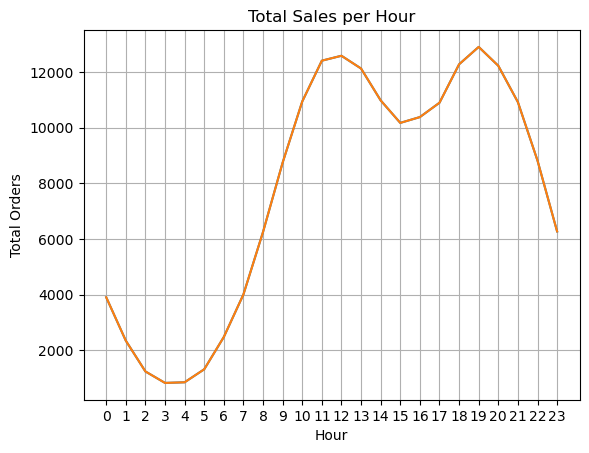

In [87]:
Hours = [Hour for Hour, df in all_data.groupby("Hour")]
Columns_to_count =["Hour", "Quantity Ordered"]
plt.plot(Hours, all_data.groupby("Hour")[Columns_to_count].count() )
plt.xticks(Hours)
plt.xlabel('Hour')
plt.ylabel('Total Orders')
plt.title('Total Sales per Hour')
plt.grid()

#My recommendation is between 7 and 8 am and between 5 and 6 pm

#### Products that are often sold together

In [102]:
df= all_data[all_data["Order ID"].duplicated(keep=False)] #finding duplicated order IDs
df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x)) #Joining products with the same order ID inti one row
df = df[["Order ID", "Grouped"]].drop_duplicates() #Drop duplicate rows

C:\Users\kizit\AppData\Local\Temp\ipykernel_16340\3363056510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x)) #Joining products with the same order ID inti one row


In [107]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)
    

#iPhone and lightning cable were the most sold pair. They can be sold together in a promo to increase sales

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Most sold product

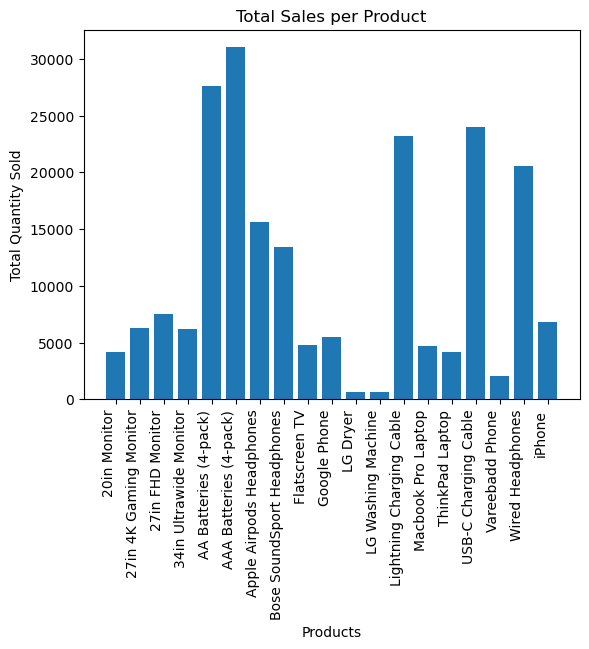

In [113]:
Sum_columns=["Quantity Ordered"]
Product_sales = all_data.groupby("Product")[Sum_columns].sum()

products=[product for product, df in all_data.groupby("Product")]


plt.bar(products, Product_sales["Quantity Ordered"])
plt.xlabel('Products')
plt.ylabel('Total Quantity Sold')
plt.title('Total Sales per Product')
plt.xticks(rotation="vertical", ha="right")
plt.show()

C:\Users\kizit\AppData\Local\Temp\ipykernel_16340\1388658099.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation="vertical", ha="right")


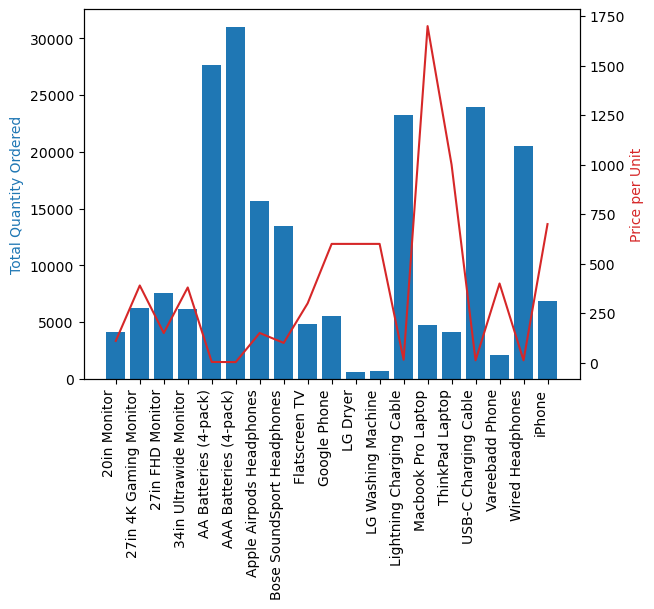

In [123]:
#Test hypothesis whether price is the contributing factor to the sales volumes
prices = all_data.groupby("Product")["Price Each"].mean()
fig, ax1 = plt.subplots()

# Plot the first data on the primary y-axis
ax1.bar(products, Product_sales["Quantity Ordered"], color='tab:blue')
ax1.set_ylabel("Total Quantity Ordered", color='tab:blue')

# Create second y-axis
ax2 = ax1.twinx()

# Plot the second data on the secondary y-axis
ax2.plot(products, prices, color='tab:red')
ax2.set_ylabel('Price per Unit', color='tab:red')
ax1.set_xticklabels(products, rotation="vertical", ha="right")
plt.show()